# Homework 1: Linear Algebra and Floating Point Arithmetic

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sp
import math

## Direct Methods for the solution of Linear Systems

### Exercise 1

In [72]:
def exercise1(A: np.array, x_true: np.array):
    """
        Given a matrix A and a vector x_true computes the following:
            - Solution b of the linear system Ax_true = b
            - Condition number in 2-norm
            - Expected x of the linear system Ax = b using the b computed before
            - The relative error between x_true and x
    """

    # Compute the solution b of the linear system Ax_true = b
    b = A @ x_true

    # Compute the condition number in 2-norm and say wether the matrix
    #  is ill-conditioned.
    
    # CHECK THE MATRIX IS INVERTIBLE
    if np.linalg.det(A) != 0:
        # The matrix is non-singular (it's invertible)
        k2 = np.linalg.cond(A)
        kInf = np.linalg.cond(A, np.Inf)
    else:
        print("The matrix is singular. Cannot get inverse matrix.")


    # Compute the expected x of the linear system Ax = b
    x = np.linalg.solve(A, b)

    # Compute the relative error.
    error = (np.linalg.norm((x - x_true)) / np.linalg.norm(x_true))

    return b, k2, kInf, x, error

### Exercise 2

In [73]:
# Set up dimension
n = 3

# Create A and x_true
A = np.random.randn(n, n)
x_true = np.ones((n, ))

b, k2, kInf, x, error = exercise1(A, x_true)

# Visualiza solution
print(f"The generated matrix is: \n{A}")
print(f"The x_true vector is: {x_true}")
print(f"Ax_true = {b}")
print(f"The condition number in 2-norm of A is: {k2}")
print(f"The condition number in Inf-norm of A is: {kInf}")
print(f"The solution to the system Ax = b given A and b is: {x}")
print(f"The relative error between x_true and x is: {error}")

The generated matrix is: 
[[ 0.02675394  0.71547178 -1.62697732]
 [ 0.21782574  1.51400649 -0.14659638]
 [ 0.43243042 -0.77057955  0.82282164]]
The x_true vector is: [1. 1. 1.]
Ax_true = [-0.8847516   1.58523584  0.48467252]
The condition number in 2-norm of A is: 5.325640213408579
The condition number in Inf-norm of A is: 8.240058276274885
The solution to the system Ax = b given A and b is: [1. 1. 1.]
The relative error between x_true and x is: 2.866583523299506e-16


In [74]:
def visualize(n_vec, error_vec, k2_vec, kInf_vec):

    # Set size of the figure
    plt.figure(figsize=(20,5))

    # Subplot 1: Relative errors
    plt.subplot(1, 3, 1)
    plt.title("Relative errors")
    plt.plot(n_vec, error_vec)

    # Subplot 2: Condition number in base of 2-norm
    plt.subplot(1, 3, 2)
    plt.title("K_2 number")
    plt.plot(n_vec, k2_vec)

    # Subplot 3: Condition number in base of Inf-norm
    plt.subplot(1, 3, 3)
    plt.title("K_inf number")
    plt.plot(n_vec, kInf_vec)

    # Display results
    plt.show()

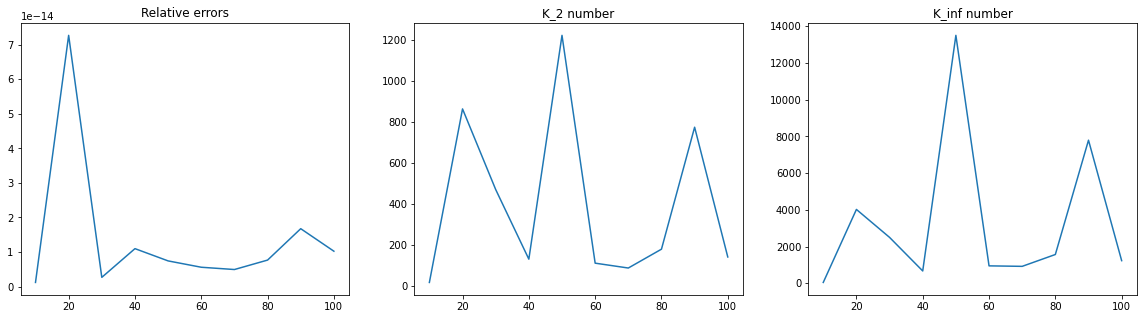

In [75]:
n_vec = np.arange(10, 101, 10)
k2_vec = []
kInf_vec = []
error_vec = []

for n in n_vec:
    # Generate data for each size
    A = np.random.randn(n, n)
    x_true = np.ones((n,))

    _, k2, kInf, _, error, = exercise1(A, x_true)
    error_vec.append(error)
    k2_vec.append(k2)
    kInf_vec.append(kInf)

# Visualiza the results
visualize(n_vec, error_vec, k2_vec, kInf_vec)

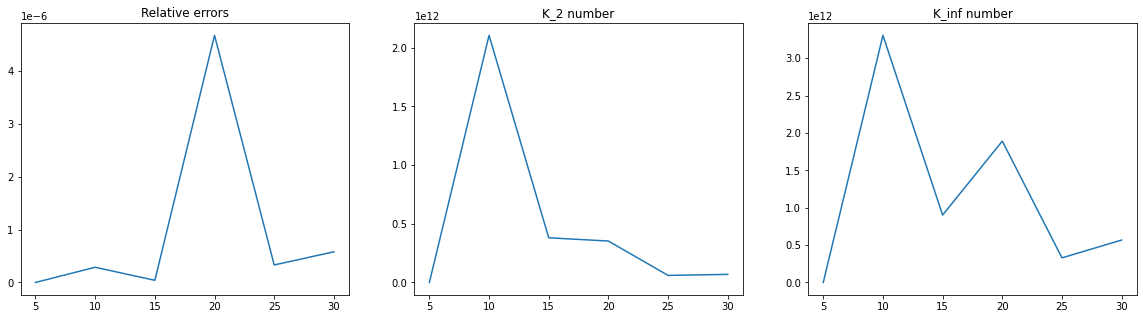

In [76]:
n_vec = np.arange(5, 31, 5)
k2_vec = []
kInf_vec = []
error_vec = []

for n in n_vec:
    # Generate data for each size
    vand_vec = np.arange(1, n+1)
    A = np.vander(vand_vec)
    x_true = np.ones((n,))

    _, k2, kInf, _, error, = exercise1(A, x_true)
    error_vec.append(error)
    k2_vec.append(k2)
    kInf_vec.append(kInf)

# Visualiza the results
visualize(n_vec, error_vec, k2_vec, kInf_vec)

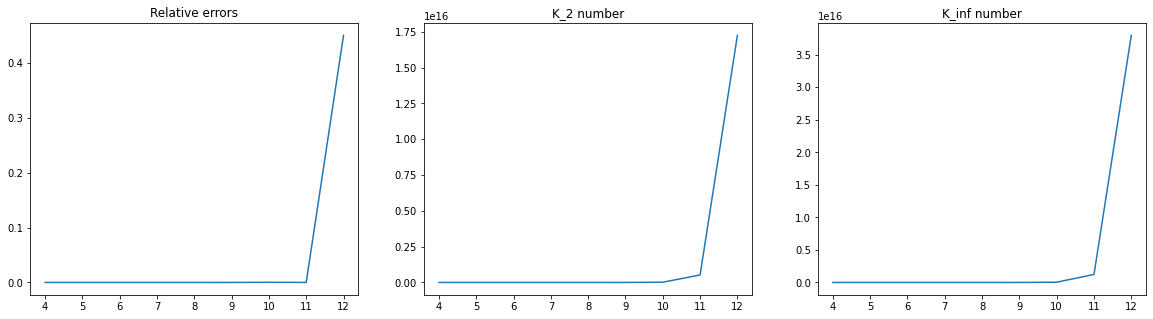

In [77]:
n_vec = np.arange(4, 13, 1)
k2_vec = []
kInf_vec = []
error_vec = []

for n in n_vec:
    # Generate data for each size
    A = sp.hilbert(n)
    x_true = np.ones((n,))

    _, k2, kInf, _, error, = exercise1(A, x_true)
    error_vec.append(error)
    k2_vec.append(k2)
    kInf_vec.append(kInf)

# Visualiza the results
visualize(n_vec, error_vec, k2_vec, kInf_vec)

## Floating Point Arithmetic

### Exercise 1

In [78]:
def compute_machineEPS():
    eps = float(1)
    while float(1 + eps) > 1:
        eps /= float(2)
        last_eps = eps

    return last_eps

In [79]:
machine_eps = compute_machineEPS()
print(machine_eps) 

1.1102230246251565e-16


We can see the obtained machine epsilon is the corresponding to the Standard Floating-Point system in double precision.

### Exercise 2

In [80]:
def compute_euler(n: int):
    for i in range(n):
        x = (1 + (1/n))**n

    return x

In [81]:
e = math.e
app_e = compute_euler(10000000)
print(f"True value of euler's constant: {e} \nComputed value of euler's constant: {app_e}")

True value of euler's constant: 2.718281828459045 
Computed value of euler's constant: 2.7182816941320818


We can notice the larger the number is, the closer it gets to the euler number. Here we are producing a truncation error, due to the termination of an iterative sequence before the convergence.

### Exercise 3

In [82]:
A = np.array(
    [
        [4, 2],
        [1, 3]
    ]
)

B = np.array(
    [
        [4, 2],
        [2, 1]
    ]
)

In [83]:
rankA = np.linalg.matrix_rank(A)
rankB = np.linalg.matrix_rank(B)

eigvals_A, _ = np.linalg.eig(A)
eigvals_B, _ = np.linalg.eig(B)

print(f"Rank of matrix A: {rankA}")
print(f"Minimun dimension of A: {min(A.shape)}")
print("")
print(f"Rank of matrix B: {rankB}")
print(f"Minimun dimension of B: {min(B.shape)}")
print("")
print(f"Eigenvalues of matrix A: \n{np.diag(eigvals_A)}\n")
print(f"Eigenvalues of matrix B: \n{np.diag(eigvals_B)}")

Rank of matrix A: 2
Minimun dimension of A: 2

Rank of matrix B: 1
Minimun dimension of B: 2

Eigenvalues of matrix A: 
[[5. 0.]
 [0. 2.]]

Eigenvalues of matrix B: 
[[5. 0.]
 [0. 0.]]


Notice matrix A is a full-rank matrix while B is not. This is because $rank(A) = min(m, n)$ being $m$ and $n$ the dimensions of a 2D-matrix. Notice the same does not happen for matrix B.

We can see there is a relationship between the full-rank condition and the eigenvalues of the matrix. For the matrix B we only have 1 eigenvalue. This is because the other column is linealy dependent on the first one.

We can proof this with another example. Notice we only have 1 eigenvalue and the rank of the matrix is 1. (One of the eigenvalues is not exactly zero, but almost, this could be due to computational errors).)

In [84]:
C = np.array(
    [
        [2, 6, 4],
        [1, 3, 2],
        [3, 9, 6]
    ]
)

rankC = np.linalg.matrix_rank(C)
eigvals_C, _ = np.linalg.eig(C)

print(f"Rank of matrix C: {rankC}")
print(f"Eigenvalues of matrix C: \n{np.diag(eigvals_C)}")

Rank of matrix C: 1
Eigenvalues of matrix C: 
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.10000000e+01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.66533454e-16]]
